In [3]:
pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 6.7 MB/s eta 0:00:00


In [4]:
#importing required libraries
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.sampling import GibbsSampling
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
#define bayesian network structure
network=BayesianNetwork([
    ('Burglary','Alarm'),
    ('Earthquake','Alarm'),
    ('Alarm','JohnCalls'),
    ('Alarm','MaryCalls')
])

In [6]:
#define the conditional probability distributions
cpd_burglary = TabularCPD(variable='Burglary',variable_card=2,values=[[0.999],[0.001]])
cpd_earthquake = TabularCPD(variable='Earthquake',variable_card=2,values=[[0.998],[0.002]])
cpd_alarm = TabularCPD(variable ='Alarm',variable_card=2, values=[[0.999, 0.71, 0.06, 0.05],[0.001, 0.29, 0.94, 0.95]],evidence=['Burglary','Earthquake'],evidence_card=[2,2])
cpd_john_calls = TabularCPD(variable='JohnCalls',variable_card=2,values=[[0.95,0.1],[0.05,0.9]],evidence=['Alarm'],evidence_card=[2])
cpd_mary_calls = TabularCPD(variable='MaryCalls',variable_card=2,values=[[0.99,0.3],[0.01,0.7]],evidence=['Alarm'],evidence_card=[2])

In [7]:
#Add CPDs to the network
network.add_cpds(cpd_burglary,cpd_earthquake,cpd_alarm,cpd_john_calls,cpd_mary_calls)

In [8]:
#Print the Bayesian network structure
print("Bayesian Network Structure :")
print(network)

Bayesian Network Structure :
BayesianNetwork with 5 nodes and 4 edges


In [9]:
#create a directed graph
G = nx.DiGraph()

In [10]:
# Define nodes and edges
nodes=['Burglary','Earthquake','Alarm','JohnCalls','MaryCalls']
edges=[('Burglary','Alarm'),('Earthquake','Alarm'),('Alarm','JohnCalls'),('Alarm','MaryCalls')]

In [11]:
#Add nodes and edges to the graph
G.add_nodes_from(nodes)
G.add_edges_from(edges)

In [12]:
#Set positions for nodes(optional)
pos ={
    'Burglary':(0,0),
    'Earthquake':(2,0),
    'Alarm':(1,-2),
    'JohnCalls':(0,-4),
    'MaryCalls':(2,-4)
}

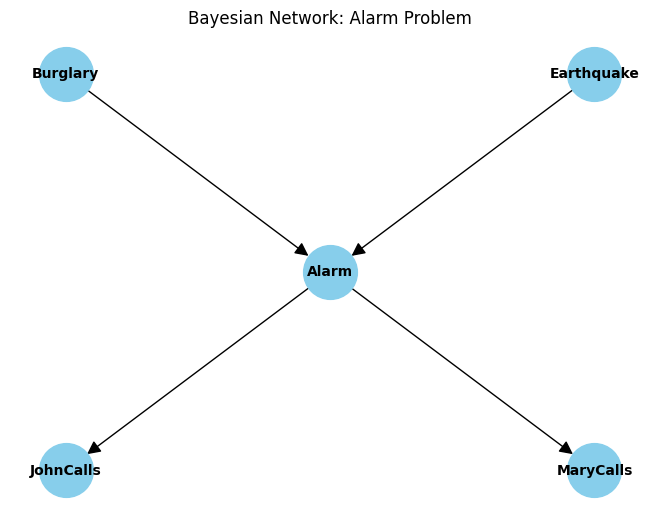

In [14]:
#Draw the graph
nx.draw(G,pos,with_labels=True,node_size=1500,node_color='skyblue',font_size=10,font_weight='bold',arrowsize=20)
plt.title("Bayesian Network: Alarm Problem")
plt.show()

In [15]:
#Initialize Gibbs sampling for MCMC
gibbs_sampler =GibbsSampling(network)

In [16]:
#Set the number of samples
num_samples=10000

In [17]:
#perform MCMC sampling
samples=gibbs_sampler.sample(size=num_samples)

  0%|          | 0/9999 [00:00<?, ?it/s]

In [18]:
#Calculate approximate probabilities based on the samples
query_variable='Burglary'
query_result= samples[query_variable].value_counts(normalize=True)

In [19]:
# print the approximate probabilities
print("\n Approximate Probabilities o-f {}".format(query_variable))
print(query_result)



 Approximate Probabilities of Burglary
0    0.9978
1    0.0022
Name: Burglary, dtype: float64
